In [15]:
from numpy import array
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import pandas as pd
from numpy import loadtxt
from keras.models import load_model

amc_model = load_model('AMCModel.h5')
gme_model = load_model('GMEModel.h5')

In [16]:
amc_testing = pd.read_csv(r'./Data/AMC_testing_data.csv', index_col=0, parse_dates=True)
gme_testing = pd.read_csv(r'./Data/GME_testing_data.csv', index_col=0, parse_dates=True)

In [17]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [18]:
def testing_data_prep(testing_set, model):
    n_steps = 8
    #lots of data that will be moved and optimised, used for checking and testing
    price_testing = testing_set['Price'].values
    price_open_testing = testing_set['Open'].values
    price_high_testing = testing_set['High'].values
    price_low_testing = testing_set['Low'].values
    price_vol_testing = testing_set['Vol.'].values
    price_change_testing = testing_set['Change %'].values

    Tprice, y = split_sequence(price_testing, n_steps)
    Tprice = Tprice.reshape((Tprice.shape[0], n_steps, 1))
    
    Topen, y = split_sequence(price_open_testing, n_steps)
    Topen = Topen.reshape((Topen.shape[0], n_steps, 1))
    
    Thigh, y = split_sequence(price_high_testing, n_steps)
    Thigh = Thigh.reshape((Thigh.shape[0], n_steps, 1))
    
    Tlow, y = split_sequence(price_low_testing, n_steps)
    Tlow = Tlow.reshape((Tlow.shape[0], n_steps, 1))
    
    TVol, y = split_sequence(price_low_testing, n_steps)
    TVol = Tlow.reshape((Tlow.shape[0], n_steps, 1))
    
    Tchange, y = split_sequence(price_change_testing, n_steps)
    Tchange = Tchange.reshape((Tchange.shape[0], n_steps, 1))

    Ttraining = np.concatenate((Tprice, Topen, Thigh, Tlow, Tchange), axis = 2)
    #reshape to fit the convolution window
    Ttrainingwide = Ttraining.reshape(Ttraining.shape[0], Ttraining.shape[1], Ttraining.shape[2], 1)

    #may have to run this line once to prune the end of the data
    price_change_testing_test = price_change_testing[8:]
    
    predictions = model.predict(Ttraining)
    mse = mean_squared_error(price_change_testing_test, predictions)
    print(mse)
    plt.plot(predictions)
    plt.show()
    plt.plot(price_change_testing_test)
    plt.show()
    
    lstm_acc_df = pd.DataFrame()
    price_change_testing_test = price_change_testing_test.reshape(price_change_testing_test.shape[0],1)
    lstm_acc_df['Actual'] = price_change_testing_test[:,0]
    lstm_acc_df['Predict'] = predictions[:,0]
    lstm_acc_df.plot()

0.006611734499362815


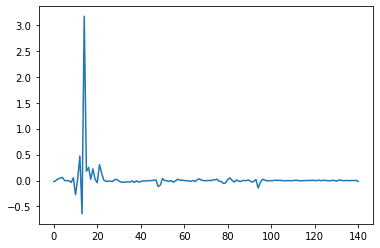

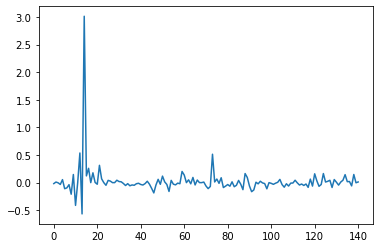

0.039510445720423205


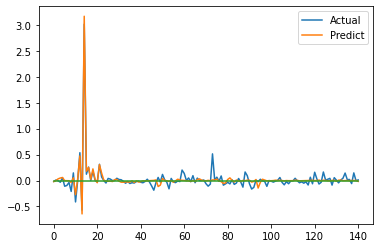

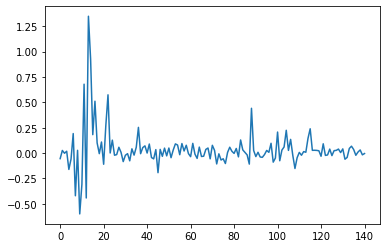

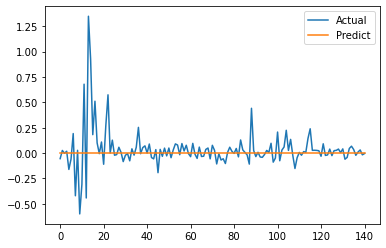

In [23]:
testing_data_prep(amc_testing, amc_model)
testing_data_prep(gme_testing, gme_model)